In [2]:
import keras

from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [3]:
print(train_data[0])
print(train_targets[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [4]:
#Normalizing the data

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [5]:
#Defining the model

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

#K-fold validation

import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

print(all_scores)
print(np.mean(all_scores))

processing fold # 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

processing fold # 1
processing fold # 2
processing fold # 3
[1.9449299573898315, 2.280168056488037, 2.6802423000335693, 2.5809643268585205]
2.3715761601924896


processing fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 1s 2ms/step - loss: 206.7665 - mae: 10.4576 - val_loss: 38.8023 - val_mae: 3.8080
Epoch 2/500
303/303 [==============================] - 1s 3ms/step - loss: 30.2207 - mae: 3.6932 - val_loss: 25.4029 - val_mae: 3.0621
Epoch 3/500
303/303 [==============================] - 1s 2ms/step - loss: 23.0723 - mae: 3.1115 - val_loss: 21.4527 - val_mae: 2.8994
Epoch 4/500
303/303 [==============================] - 1s 2ms/step - loss: 18.7628 - mae: 2.7729 - val_loss: 18.8590 - val_mae: 2.7210
Epoch 5/500
303/303 [==============================] - 1s 2ms/step - loss: 16.6957 - mae: 2.6128 - val_loss: 15.2915 - val_mae: 2.4411
Epoch 6/500
303/303 [==============================] - 1s 2ms/step - loss: 16.0978 - mae: 2.5606 - val_loss: 14.0824 - val_mae: 2.4002
Epoch 7/500
303/303 [==============================] - 1s 2ms/step - loss: 14.9481 - mae: 2.4522 - val_loss: 14.3903 - val

303/303 [==============================] - 0s 1ms/step - loss: 3.5298 - mae: 1.3147 - val_loss: 10.4603 - val_mae: 2.1599
Epoch 123/500
303/303 [==============================] - 0s 2ms/step - loss: 3.2724 - mae: 1.2957 - val_loss: 10.2110 - val_mae: 2.2315
Epoch 124/500
303/303 [==============================] - 0s 1ms/step - loss: 3.2831 - mae: 1.2832 - val_loss: 11.8549 - val_mae: 2.2847
Epoch 125/500
303/303 [==============================] - 0s 2ms/step - loss: 3.1311 - mae: 1.2854 - val_loss: 10.1324 - val_mae: 2.2131
Epoch 126/500
303/303 [==============================] - 1s 2ms/step - loss: 3.1274 - mae: 1.2296 - val_loss: 8.8550 - val_mae: 2.1774
Epoch 127/500
303/303 [==============================] - 0s 2ms/step - loss: 3.3549 - mae: 1.2741 - val_loss: 9.2380 - val_mae: 2.0575
Epoch 128/500
303/303 [==============================] - 0s 2ms/step - loss: 3.3878 - mae: 1.2555 - val_loss: 10.1126 - val_mae: 2.3903
Epoch 129/500
303/303 [==============================] - 0s 2ms/

303/303 [==============================] - 0s 1ms/step - loss: 1.8530 - mae: 0.9398 - val_loss: 11.2960 - val_mae: 2.4902
Epoch 243/500
303/303 [==============================] - 0s 1ms/step - loss: 1.8278 - mae: 0.9306 - val_loss: 10.3365 - val_mae: 2.2609
Epoch 244/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6822 - mae: 0.9639 - val_loss: 9.8645 - val_mae: 2.2690
Epoch 245/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6727 - mae: 0.9320 - val_loss: 11.3705 - val_mae: 2.3223
Epoch 246/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5961 - mae: 0.9258 - val_loss: 10.3732 - val_mae: 2.3515
Epoch 247/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5954 - mae: 0.9212 - val_loss: 10.7109 - val_mae: 2.4041
Epoch 248/500
303/303 [==============================] - 0s 1ms/step - loss: 1.7713 - mae: 0.9668 - val_loss: 11.6527 - val_mae: 2.5263
Epoch 249/500
303/303 [==============================] - 0s 1ms

303/303 [==============================] - 0s 1ms/step - loss: 1.2786 - mae: 0.8153 - val_loss: 10.3304 - val_mae: 2.3817
Epoch 363/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0997 - mae: 0.7382 - val_loss: 11.6293 - val_mae: 2.5000
Epoch 364/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1225 - mae: 0.7671 - val_loss: 10.8238 - val_mae: 2.3067
Epoch 365/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1315 - mae: 0.7440 - val_loss: 11.0530 - val_mae: 2.4623
Epoch 366/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3690 - mae: 0.8552 - val_loss: 11.6943 - val_mae: 2.4369
Epoch 367/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0184 - mae: 0.7605 - val_loss: 10.9740 - val_mae: 2.3613
Epoch 368/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0940 - mae: 0.7469 - val_loss: 13.3837 - val_mae: 2.4747
Epoch 369/500
303/303 [==============================] - 0s 1m

303/303 [==============================] - 1s 2ms/step - loss: 0.9047 - mae: 0.6786 - val_loss: 9.8525 - val_mae: 2.3639
Epoch 483/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8758 - mae: 0.6655 - val_loss: 9.5458 - val_mae: 2.2401
Epoch 484/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8516 - mae: 0.7061 - val_loss: 9.5193 - val_mae: 2.3374
Epoch 485/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8517 - mae: 0.6669 - val_loss: 10.3664 - val_mae: 2.3843
Epoch 486/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8862 - mae: 0.6759 - val_loss: 11.1697 - val_mae: 2.6029
Epoch 487/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8750 - mae: 0.6729 - val_loss: 9.4071 - val_mae: 2.3579
Epoch 488/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9381 - mae: 0.7035 - val_loss: 9.4168 - val_mae: 2.2916
Epoch 489/500
303/303 [==============================] - 1s 2ms/ste

303/303 [==============================] - 0s 1ms/step - loss: 3.3117 - mae: 1.2134 - val_loss: 14.8173 - val_mae: 2.9242
Epoch 104/500
303/303 [==============================] - 0s 1ms/step - loss: 3.5913 - mae: 1.2187 - val_loss: 12.4738 - val_mae: 2.4823
Epoch 105/500
303/303 [==============================] - 0s 1ms/step - loss: 3.4133 - mae: 1.2306 - val_loss: 22.6143 - val_mae: 3.7304
Epoch 106/500
303/303 [==============================] - 0s 2ms/step - loss: 3.5873 - mae: 1.3018 - val_loss: 11.9243 - val_mae: 2.4451
Epoch 107/500
303/303 [==============================] - 0s 1ms/step - loss: 3.3790 - mae: 1.2397 - val_loss: 17.4793 - val_mae: 2.8213
Epoch 108/500
303/303 [==============================] - 0s 2ms/step - loss: 3.4112 - mae: 1.2425 - val_loss: 12.7346 - val_mae: 2.5134
Epoch 109/500
303/303 [==============================] - 0s 1ms/step - loss: 3.5317 - mae: 1.1734 - val_loss: 12.2047 - val_mae: 2.5911
Epoch 110/500
303/303 [==============================] - 0s 2m

303/303 [==============================] - 1s 2ms/step - loss: 1.6615 - mae: 0.9252 - val_loss: 26.1655 - val_mae: 3.0561
Epoch 224/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3712 - mae: 0.8167 - val_loss: 27.6744 - val_mae: 3.1769
Epoch 225/500
303/303 [==============================] - 0s 2ms/step - loss: 1.4694 - mae: 0.8776 - val_loss: 27.9676 - val_mae: 3.3244
Epoch 226/500
303/303 [==============================] - 0s 2ms/step - loss: 1.6404 - mae: 0.9178 - val_loss: 24.6194 - val_mae: 3.1498
Epoch 227/500
303/303 [==============================] - 1s 2ms/step - loss: 1.6019 - mae: 0.8995 - val_loss: 26.9836 - val_mae: 3.0807
Epoch 228/500
303/303 [==============================] - 0s 2ms/step - loss: 1.4366 - mae: 0.8489 - val_loss: 27.4177 - val_mae: 3.1363
Epoch 229/500
303/303 [==============================] - 1s 2ms/step - loss: 1.5300 - mae: 0.8996 - val_loss: 32.0307 - val_mae: 3.3104
Epoch 230/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - ETA: 0s - loss: 1.0621 - mae: 0.699 - 0s 2ms/step - loss: 1.0374 - mae: 0.7009 - val_loss: 28.2683 - val_mae: 3.1743
Epoch 344/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9464 - mae: 0.6808 - val_loss: 33.2570 - val_mae: 3.4514
Epoch 345/500
303/303 [==============================] - 0s 2ms/step - loss: 0.9078 - mae: 0.7221 - val_loss: 30.5415 - val_mae: 3.1967
Epoch 346/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0051 - mae: 0.7296 - val_loss: 31.2108 - val_mae: 3.2087
Epoch 347/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9513 - mae: 0.7375 - val_loss: 30.5574 - val_mae: 3.1998
Epoch 348/500
303/303 [==============================] - 0s 2ms/step - loss: 0.9712 - mae: 0.7183 - val_loss: 30.4434 - val_mae: 3.3113
Epoch 349/500
303/303 [==============================] - 0s 2ms/step - loss: 0.9406 - mae: 0.7153 - val_loss: 36.5273 - val_mae: 3.5041
Epoch 350/500
303/303 [=

303/303 [==============================] - 0s 1ms/step - loss: 0.7553 - mae: 0.6497 - val_loss: 30.4675 - val_mae: 3.2646
Epoch 404/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8851 - mae: 0.6828 - val_loss: 30.7027 - val_mae: 3.1977
Epoch 405/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8841 - mae: 0.6617 - val_loss: 33.6828 - val_mae: 3.2441
Epoch 406/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8573 - mae: 0.6610 - val_loss: 24.8683 - val_mae: 3.1065
Epoch 407/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7489 - mae: 0.6626 - val_loss: 30.9657 - val_mae: 3.3494
Epoch 408/500
303/303 [==============================] - 0s 2ms/step - loss: 0.8651 - mae: 0.6898 - val_loss: 26.1909 - val_mae: 2.9509
Epoch 409/500
303/303 [==============================] - 0s 2ms/step - loss: 0.8330 - mae: 0.6502 - val_loss: 29.0095 - val_mae: 3.0351
Epoch 410/500
303/303 [==============================] - 0s 2m

303/303 [==============================] - 1s 2ms/step - loss: 7.7936 - mae: 1.9218 - val_loss: 15.9762 - val_mae: 2.6794
Epoch 24/500
303/303 [==============================] - 1s 2ms/step - loss: 7.2992 - mae: 1.8701 - val_loss: 16.2038 - val_mae: 2.7111
Epoch 25/500
303/303 [==============================] - 1s 2ms/step - loss: 7.3965 - mae: 1.9182 - val_loss: 15.7416 - val_mae: 2.6958
Epoch 26/500
303/303 [==============================] - 0s 2ms/step - loss: 7.1789 - mae: 1.9032 - val_loss: 18.3385 - val_mae: 2.9565
Epoch 27/500
303/303 [==============================] - 0s 2ms/step - loss: 6.7820 - mae: 1.8250 - val_loss: 14.8803 - val_mae: 2.5571
Epoch 28/500
303/303 [==============================] - 0s 2ms/step - loss: 6.6125 - mae: 1.8022 - val_loss: 16.9147 - val_mae: 2.8716
Epoch 29/500
303/303 [==============================] - 0s 1ms/step - loss: 6.6501 - mae: 1.7577 - val_loss: 15.9638 - val_mae: 2.8448
Epoch 30/500
303/303 [==============================] - 0s 1ms/step 

Epoch 84/500
303/303 [==============================] - 1s 4ms/step - loss: 3.7814 - mae: 1.3976 - val_loss: 14.6077 - val_mae: 2.6279
Epoch 85/500
303/303 [==============================] - 1s 2ms/step - loss: 3.6503 - mae: 1.3768 - val_loss: 14.4438 - val_mae: 2.5906
Epoch 86/500
303/303 [==============================] - 0s 2ms/step - loss: 3.8573 - mae: 1.3936 - val_loss: 14.5202 - val_mae: 2.5707
Epoch 87/500
303/303 [==============================] - 0s 1ms/step - loss: 3.7048 - mae: 1.3745 - val_loss: 14.5767 - val_mae: 2.6628
Epoch 88/500
303/303 [==============================] - 0s 1ms/step - loss: 3.3519 - mae: 1.2889 - val_loss: 16.3093 - val_mae: 2.7836
Epoch 89/500
303/303 [==============================] - 0s 2ms/step - loss: 3.6140 - mae: 1.3477 - val_loss: 15.6785 - val_mae: 2.6755
Epoch 90/500
303/303 [==============================] - 1s 3ms/step - loss: 3.6510 - mae: 1.3467 - val_loss: 13.5747 - val_mae: 2.5867
Epoch 91/500
303/303 [==============================] -

303/303 [==============================] - 1s 3ms/step - loss: 1.2697 - mae: 0.8229 - val_loss: 14.0673 - val_mae: 2.7070
Epoch 205/500
303/303 [==============================] - 1s 3ms/step - loss: 1.5105 - mae: 0.9199 - val_loss: 15.5706 - val_mae: 2.7784
Epoch 206/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4130 - mae: 0.8595 - val_loss: 15.6161 - val_mae: 2.7929
Epoch 207/500
303/303 [==============================] - 1s 3ms/step - loss: 1.5428 - mae: 0.8902 - val_loss: 15.0094 - val_mae: 2.7444
Epoch 208/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3912 - mae: 0.8776 - val_loss: 14.7999 - val_mae: 2.7051
Epoch 209/500
303/303 [==============================] - 1s 3ms/step - loss: 1.4146 - mae: 0.9060 - val_loss: 16.0793 - val_mae: 2.7727
Epoch 210/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3880 - mae: 0.9058 - val_loss: 15.6628 - val_mae: 2.7444
Epoch 211/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 2ms/step - loss: 1.0615 - mae: 0.7620 - val_loss: 15.8749 - val_mae: 2.8934
Epoch 325/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0130 - mae: 0.7272 - val_loss: 14.8337 - val_mae: 2.7770
Epoch 326/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8048 - mae: 0.6663 - val_loss: 15.1165 - val_mae: 2.7970
Epoch 327/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9804 - mae: 0.7583 - val_loss: 16.1133 - val_mae: 2.9193
Epoch 328/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0403 - mae: 0.7378 - val_loss: 15.6905 - val_mae: 2.8384
Epoch 329/500
303/303 [==============================] - 0s 2ms/step - loss: 1.0543 - mae: 0.7333 - val_loss: 15.8061 - val_mae: 2.8507
Epoch 330/500
303/303 [==============================] - 1s 2ms/step - loss: 1.0631 - mae: 0.7230 - val_loss: 16.7014 - val_mae: 2.9134
Epoch 331/500
303/303 [==============================] - 0s 2m

303/303 [==============================] - 1s 3ms/step - loss: 0.7215 - mae: 0.6115 - val_loss: 14.3624 - val_mae: 2.7999
Epoch 445/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7234 - mae: 0.6438 - val_loss: 15.1501 - val_mae: 2.8564
Epoch 446/500
303/303 [==============================] - 1s 3ms/step - loss: 0.6765 - mae: 0.5976 - val_loss: 15.3761 - val_mae: 2.8682
Epoch 447/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7902 - mae: 0.6300 - val_loss: 14.0899 - val_mae: 2.7341
Epoch 448/500
303/303 [==============================] - 1s 2ms/step - loss: 0.7845 - mae: 0.6392 - val_loss: 14.6536 - val_mae: 2.8721
Epoch 449/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8131 - mae: 0.6361 - val_loss: 13.5665 - val_mae: 2.7605
Epoch 450/500
303/303 [==============================] - 1s 3ms/step - loss: 0.6396 - mae: 0.5935 - val_loss: 14.1123 - val_mae: 2.7448
Epoch 451/500
303/303 [==============================] - 1s 3m

Epoch 64/500
303/303 [==============================] - 1s 2ms/step - loss: 5.7523 - mae: 1.5969 - val_loss: 13.3211 - val_mae: 2.5774
Epoch 65/500
303/303 [==============================] - 1s 2ms/step - loss: 5.7754 - mae: 1.5204 - val_loss: 12.7772 - val_mae: 2.5126
Epoch 66/500
303/303 [==============================] - 1s 2ms/step - loss: 6.0106 - mae: 1.5251 - val_loss: 13.4769 - val_mae: 2.6548
Epoch 67/500
303/303 [==============================] - 1s 2ms/step - loss: 5.8389 - mae: 1.5705 - val_loss: 12.6870 - val_mae: 2.4948
Epoch 68/500
303/303 [==============================] - 1s 2ms/step - loss: 5.6196 - mae: 1.5277 - val_loss: 12.5209 - val_mae: 2.5353
Epoch 69/500
303/303 [==============================] - 1s 2ms/step - loss: 5.9010 - mae: 1.4882 - val_loss: 12.4803 - val_mae: 2.5386
Epoch 70/500
303/303 [==============================] - ETA: 0s - loss: 5.7554 - mae: 1.495 - 1s 2ms/step - loss: 5.8307 - mae: 1.5217 - val_loss: 13.0321 - val_mae: 2.5502
Epoch 71/500
303/

303/303 [==============================] - 1s 2ms/step - loss: 3.0326 - mae: 1.1002 - val_loss: 14.0338 - val_mae: 2.6900
Epoch 185/500
303/303 [==============================] - 1s 2ms/step - loss: 2.7249 - mae: 1.0627 - val_loss: 13.1127 - val_mae: 2.5941
Epoch 186/500
303/303 [==============================] - 1s 2ms/step - loss: 2.7024 - mae: 1.0261 - val_loss: 12.8527 - val_mae: 2.5794
Epoch 187/500
303/303 [==============================] - 1s 2ms/step - loss: 2.5152 - mae: 1.0501 - val_loss: 14.0256 - val_mae: 2.6851
Epoch 188/500
303/303 [==============================] - 1s 3ms/step - loss: 2.8499 - mae: 1.0762 - val_loss: 14.3704 - val_mae: 2.7790
Epoch 189/500
303/303 [==============================] - 1s 2ms/step - loss: 2.8475 - mae: 1.0834 - val_loss: 16.9726 - val_mae: 3.1425
Epoch 190/500
303/303 [==============================] - 1s 2ms/step - loss: 2.6127 - mae: 1.0260 - val_loss: 15.0603 - val_mae: 2.8245
Epoch 191/500
303/303 [==============================] - 1s 2m

303/303 [==============================] - 1s 2ms/step - loss: 1.5409 - mae: 0.8627 - val_loss: 13.4205 - val_mae: 2.6051
Epoch 305/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4502 - mae: 0.8646 - val_loss: 13.7430 - val_mae: 2.5862
Epoch 306/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3395 - mae: 0.8158 - val_loss: 13.7971 - val_mae: 2.6599
Epoch 307/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4593 - mae: 0.8172 - val_loss: 14.8438 - val_mae: 2.7226
Epoch 308/500
303/303 [==============================] - 1s 2ms/step - loss: 1.4591 - mae: 0.8419 - val_loss: 15.0654 - val_mae: 2.7918
Epoch 309/500
303/303 [==============================] - 0s 2ms/step - loss: 1.4303 - mae: 0.8468 - val_loss: 13.7430 - val_mae: 2.6291
Epoch 310/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3438 - mae: 0.8072 - val_loss: 14.1530 - val_mae: 2.6453
Epoch 311/500
303/303 [==============================] - 0s 2m

303/303 [==============================] - 1s 2ms/step - loss: 0.8758 - mae: 0.6885 - val_loss: 14.9629 - val_mae: 2.7282
Epoch 425/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9653 - mae: 0.7338 - val_loss: 16.5117 - val_mae: 2.9139
Epoch 426/500
303/303 [==============================] - 1s 2ms/step - loss: 0.8440 - mae: 0.6976 - val_loss: 15.9914 - val_mae: 2.8318
Epoch 427/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8982 - mae: 0.6961 - val_loss: 15.9166 - val_mae: 2.8861
Epoch 428/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9660 - mae: 0.6909 - val_loss: 16.2108 - val_mae: 2.8141
Epoch 429/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9237 - mae: 0.6912 - val_loss: 14.8365 - val_mae: 2.7306
Epoch 430/500
303/303 [==============================] - 1s 2ms/step - loss: 0.9304 - mae: 0.7136 - val_loss: 15.0046 - val_mae: 2.7852
Epoch 431/500
303/303 [==============================] - 1s 2m

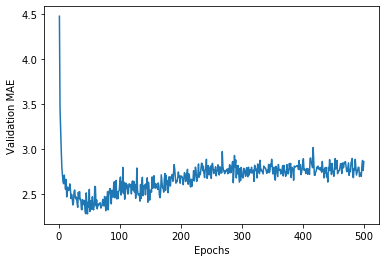

In [6]:
#Saving the validation logs at each fold

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)

    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=1)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

#Building the history of successive mean K-fold validation scores

average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#Plotting Validation Scores

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It may be a little difficult to see the plot, due to scaling issues and relatively high variance.
Let’s do the following:
 Omit the first 10 data points, which are on a different scale than the rest of the curve.
 Replace each point with an exponential moving average of the previous points,
to obtain a smooth curve.

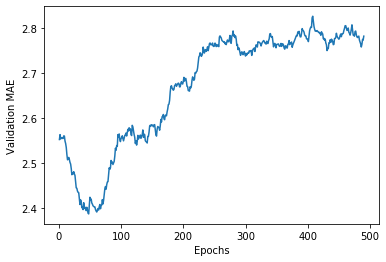

In [9]:
#Plotting validation scores, excluding the first 10 data points

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

According to this plot, validation MAE stops improving significantly after 80 epochs.
Past that point, you start overfitting.

In [10]:
#Training the final model

model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/80
404/404 [==============================] - 0s 592us/step - loss: 506.7995 - mae: 20.4902
Epoch 2/80
404/404 [==============================] - 0s 326us/step - loss: 337.4356 - mae: 16.0456
Epoch 3/80
404/404 [==============================] - 0s 209us/step - loss: 158.5369 - mae: 10.0339
Epoch 4/80
404/404 [==============================] - 0s 287us/step - loss: 65.5194 - mae: 5.7857
Epoch 5/80
404/404 [==============================] - 0s 210us/step - loss: 41.3385 - mae: 4.5403
Epoch 6/80
404/404 [==============================] - 0s 132us/step - loss: 30.3251 - mae: 3.8858
Epoch 7/80
404/404 [==============================] - 0s 403us/step - loss: 24.9356 - mae: 3.4571
Epoch 8/80
404/404 [==============================] - 0s 193us/step - loss: 21.3640 - mae: 3.1679
Epoch 9/80
404/404 [==============================] - 0s 171us/step - loss: 19.0383 - mae: 3.0595
Epoch 10/80
404/404 [==============================] - 0s 132us/step - loss: 17.4223 - mae: 2.8863
Epoch 11/80
4

In [11]:
test_mae_score

2.8295443058013916